# Recent advancements in Histogramming
## Henry Schreiner, Aman Geol, and Nino Lau


Run the code with us through Binder, altering examples and asking "what if" questions along the way :)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/henryiii/histogram-tutorial/master?filepath=talk_1_bh_uhi.ipynb)

# A new era: boost-histogram 1.0!

Boost-histogram 1.0 came out with some great features:

* Removal of Python 2.7 & 3.5 support
    * Fewer lines of code and more features than 0.13!
* Fully staticly typed
* Easier subclassing

Along with many great features available in 0.11-0.13:
* Much simpler, Pythonic metadata system
* Much better access to accumulator storages
* PlottableProtocol support! (see UHI section later)

Huge updates to pybind11 & cibuildwheel as part of this work, too!
* New CMake and setuptools helpers
* 40% faster accumulation with less memory used
* Python 3.9 support
* And much more!

# Demo: statically typed histogram

# UHI: Unified Histotogram Interface

A staticly typed protocol for plotting histograms from any source.

Also an actual PyPI library, with helper functions, and lots of centralized documentation.

# Demo: Plotting a boost-histogram with mplhep or histoprint

In [1]:
import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

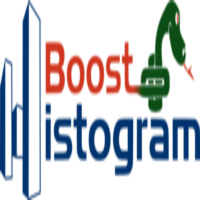

In [2]:
sp = Image.open("bh-icon.png")
sp

In [3]:
arr = np.asarray(sp)[:, :, 3]

In [4]:
x, y, p = np.random.default_rng().random((3, 200_000))

In [14]:
bx = (x * 200).astype(np.int32)
by = (y * 200).astype(np.int32)

In [15]:
# Probibility of hit
prob = arr[by, bx] / 255

# True if hit
hits = prob > p

In [16]:
X = x[hits]
Y = 1 - (y[hits] / 200 * 200 + (1 / 200))

In [17]:
h = bh.Histogram(
    bh.axis.Regular(300, 0, 1, metadata="x"), bh.axis.Regular(300, 0, 1, metadata="y")
)

h.fill(X, Y)

Histogram(
  Regular(300, 0, 1, metadata='x'),
  Regular(300, 0, 1, metadata='y'),
  storage=Double()) # Sum: 51969.0 (51987.0 with flow)

In [18]:
def plt_h2(h):
    x, y = h.axes.edges
    plt.pcolormesh(x.T, y.T, h.view().T)
    plt.gca().set_aspect("equal", "box")
    plt.xlabel(h.axes[0].metadata)
    plt.ylabel(h.axes[1].metadata)

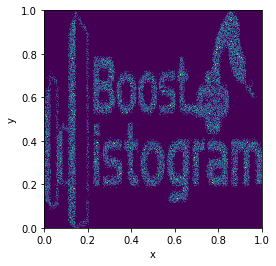

In [19]:
plt_h2(h)

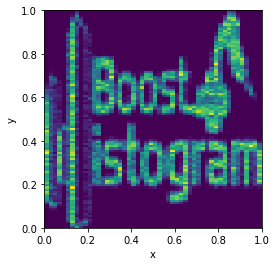

In [20]:
plt_h2(h[:: bh.rebin(6), :: bh.rebin(3)])

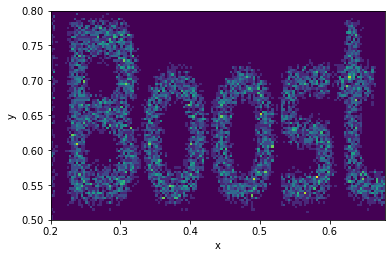

In [23]:
plt_h2(h[bh.loc(0.2):bh.loc(0.68), bh.loc(0.5):bh.loc(0.8)])

In [24]:
from histoprint import text_hist, print_hist